<a href="https://colab.research.google.com/github/Habeebhb/Habeeb_DS_Zeotap/blob/main/Habeeb_Rahuman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA Analysis of the Customer, Product , and Transaction.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Loading the Datasets
customers_file='/content/Customers.csv'
product_file='/content/Products.csv'
transaction_file='/content/Transactions.csv'

In [6]:
# Read the Datasets
customers_df = pd.read_csv(customers_file)
product_df = pd.read_csv(product_file)
transaction_df = pd.read_csv(transaction_file)


In [7]:
# Merge the Datasets
transactions_customers = pd.merge(transaction_df, customers_df, on="CustomerID", how="left")
merged_df = pd.merge(transactions_customers, product_df, on="ProductID", how="left")


In [8]:
# Cleaning the Dataset
merged_df = merged_df.drop(columns=["Price_x"])
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])
merged_df["SignupDate"] = pd.to_datetime(merged_df["SignupDate"])
merged_df["TransactionYear"] = merged_df["TransactionDate"].dt.year
merged_df["TransactionMonth"] = merged_df["TransactionDate"].dt.month


In [9]:
# Revenue Trend
revenue_trends = (
    merged_df.groupby(["TransactionYear", "TransactionMonth"])["TotalValue"]
    .sum()
    .reset_index()
    .rename(columns={"TotalValue": "MonthlyRevenue"})
)


In [10]:
# Customer activity analysis
merged_df["CustomerAge"] = (merged_df["TransactionDate"] - merged_df["SignupDate"]).dt.days
merged_df["CustomerType"] = merged_df["CustomerAge"].apply(lambda x: "New" if x <= 365 else "Old")
customer_type_contribution = (
    merged_df.groupby("CustomerType")["TotalValue"]
    .sum()
    .reset_index()
    .rename(columns={"TotalValue": "Revenue"})
)


In [11]:
# Product performance analysis
top_products = (
    merged_df.groupby("ProductName")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
category_revenue = (
    merged_df.groupby("Category")["TotalValue"]
    .sum()
    .reset_index()
    .rename(columns={"TotalValue": "Revenue"})
)


In [12]:
# Region Analysis
region_revenue = (
    merged_df.groupby("Region")["TotalValue"]
    .sum()
    .reset_index()
    .rename(columns={"TotalValue": "Revenue"})
)


In [13]:
# New vs Old customer
new_customers_revenue = customer_type_contribution.loc[customer_type_contribution["CustomerType"] == "New", "Revenue"].values[0]
old_customers_revenue = customer_type_contribution.loc[customer_type_contribution["CustomerType"] == "Old", "Revenue"].values[0]
new_customers_percentage = (new_customers_revenue / (new_customers_revenue + old_customers_revenue)) * 100
old_customers_percentage = (old_customers_revenue / (new_customers_revenue + old_customers_revenue)) * 100


In [14]:
# Region with highest revenue
region_y = region_revenue.loc[region_revenue["Revenue"].idxmax(), "Region"]
region_y_revenue = region_revenue.loc[region_revenue["Revenue"].idxmax(), "Revenue"]


In [15]:
# Visulizations
sns.set(style="whitegrid", palette="muted")


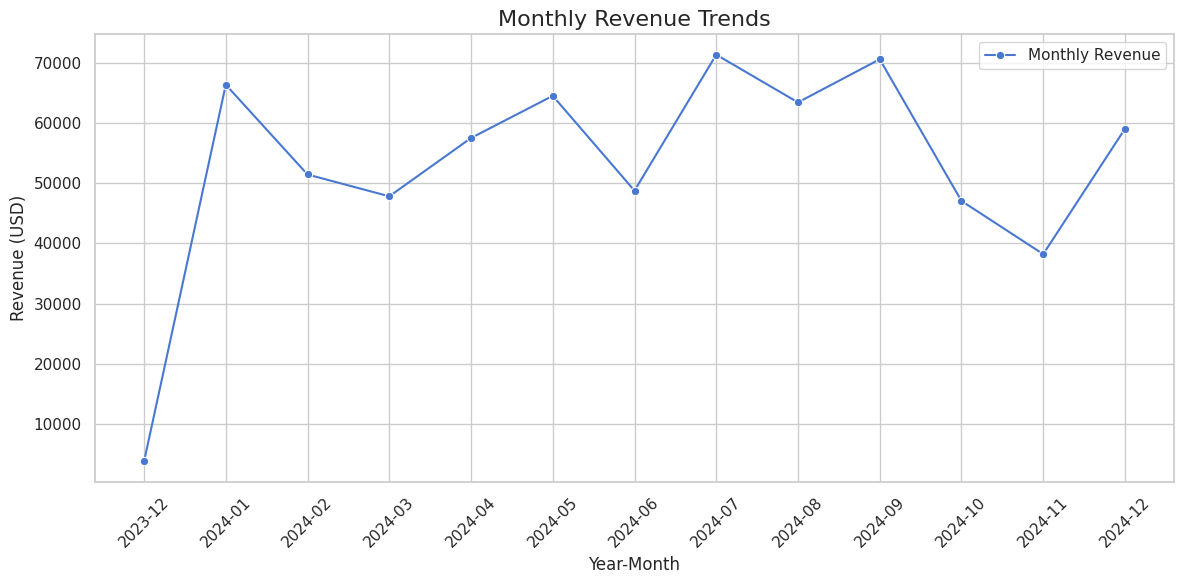

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=revenue_trends,
    x=range(len(revenue_trends)),
    y="MonthlyRevenue",
    marker="o",
    label="Monthly Revenue",
)
plt.xticks(
    range(len(revenue_trends)),
    [f"{year}-{month:02d}" for year, month in zip(revenue_trends["TransactionYear"], revenue_trends["TransactionMonth"])],
    rotation=45,
)
plt.title("Monthly Revenue Trends", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-18-087d5df84d29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="TotalValue", y="ProductName", palette="viridis")


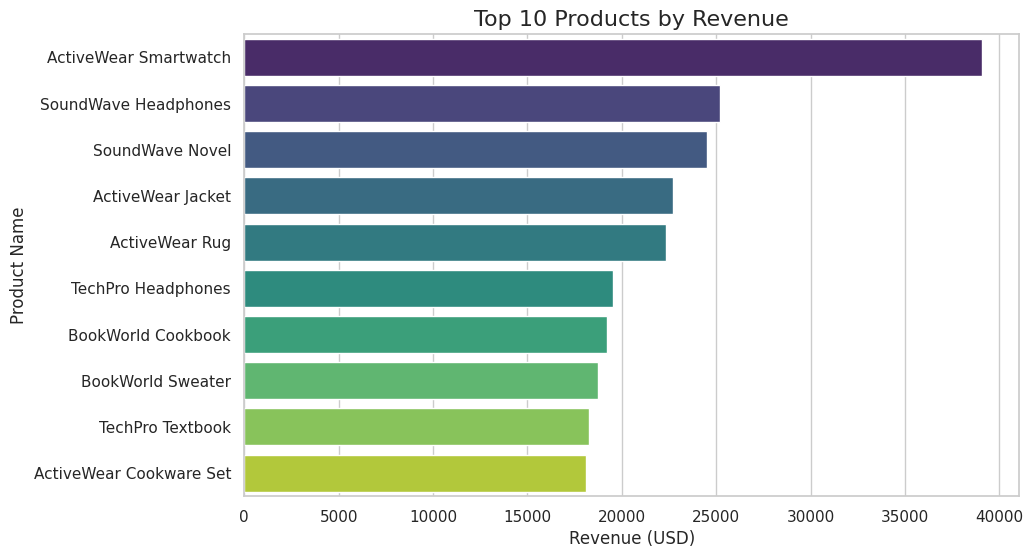

In [18]:
# Top products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="TotalValue", y="ProductName", palette="viridis")
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()



<ipython-input-19-ecbcd0e10cea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x="Revenue", y="Category", palette="muted")


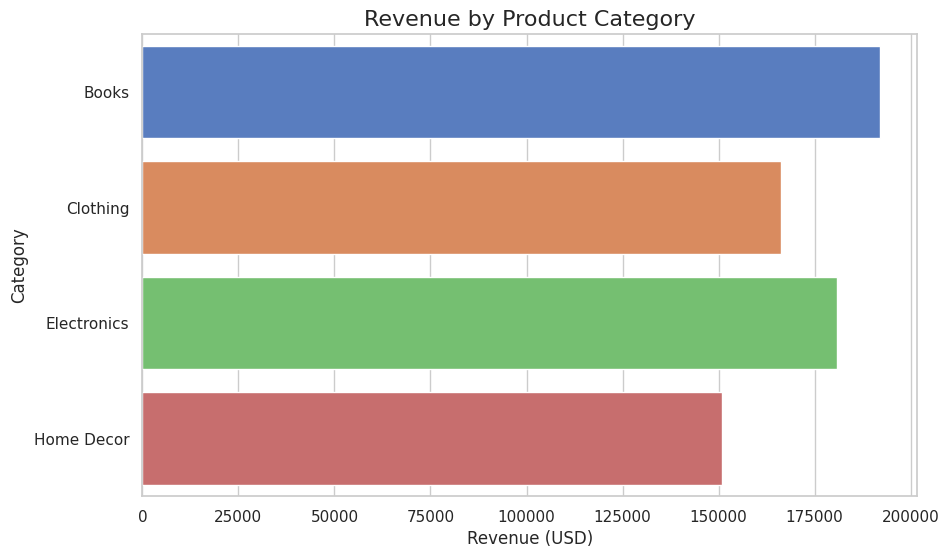

In [19]:
# Revenue by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x="Revenue", y="Category", palette="muted")
plt.title("Revenue by Product Category", fontsize=16)
plt.xlabel("Revenue (USD)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()


<ipython-input-20-c04a1586da07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x="Revenue", y="Region", palette="coolwarm")


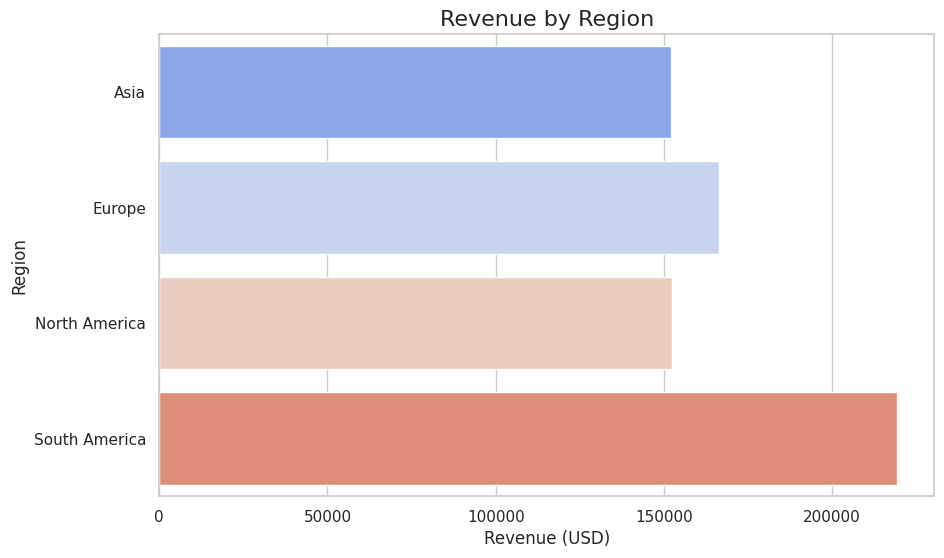

In [20]:
# Revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_revenue, x="Revenue", y="Region", palette="coolwarm")
plt.title("Revenue by Region", fontsize=16)
plt.xlabel("Revenue (USD)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()



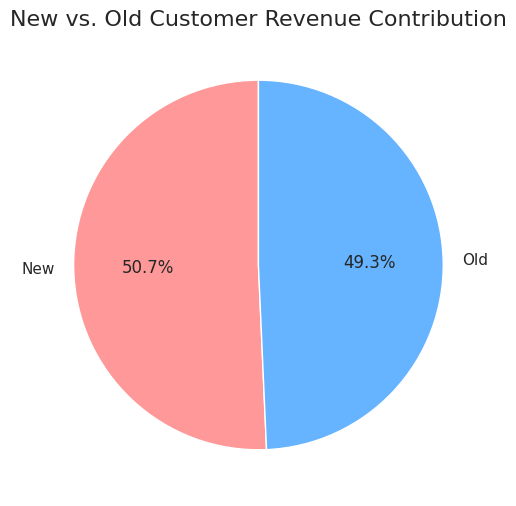

In [21]:
# New vs. Old Customer Contribution
plt.figure(figsize=(6, 6))
plt.pie(
    customer_type_contribution["Revenue"],
    labels=customer_type_contribution["CustomerType"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999", "#66b3ff"],
)
plt.title("New vs. Old Customer Revenue Contribution", fontsize=16)
plt.show()



In [22]:
# Print insights
print("Business Insights:")
print(f"1. New customers contribute {new_customers_percentage:.2f}% of the revenue, while old customers contribute {old_customers_percentage:.2f}%.")
print(f"2. The region with the highest revenue is {region_y} with a total revenue of ${region_y_revenue:.2f}.")
print("3. The top 10 products account for a significant portion of total revenue. Focus on promoting these products.")
print("4. Electronics is the top-performing category. Expanding product lines in this category could drive more sales.")
print("5. Regions with lower transaction counts but high revenue should be analyzed for high-value transactions.")


Business Insights:
1. New customers contribute 50.70% of the revenue, while old customers contribute 49.30%.
2. The region with the highest revenue is South America with a total revenue of $219352.56.
3. The top 10 products account for a significant portion of total revenue. Focus on promoting these products.
4. Electronics is the top-performing category. Expanding product lines in this category could drive more sales.
5. Regions with lower transaction counts but high revenue should be analyzed for high-value transactions.
